In [1]:
#importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data file
df= pd.read_excel(r"C:\Users\SATYAM\Downloads\pharma_forecasting_dummy_custom_500.xlsx")

In [3]:
df.head(5)

,Year,Country,Product Name,Dosage Form,Manufacturer,Price (USD),Units,Market / Channel,Sales (USD)
0,2025,India,DrugD,Syrup,Novartis,474.74,156,Retail,74059.44
1,2025,India,DrugB,Capsule,Roche,87.22,86,Retail,7500.92
2,2024,Germany,DrugB,IV Infusion,Sanofi,489.55,82,Hospital,40143.10
3,2025,Brazil,DrugC,Tablet,Sanofi,416.42,113,Hospital,47055.46
4,2024,Germany,DrugD,Capsule,Pfizer,43.98,166,Hospital,7300.68


<Axes: >

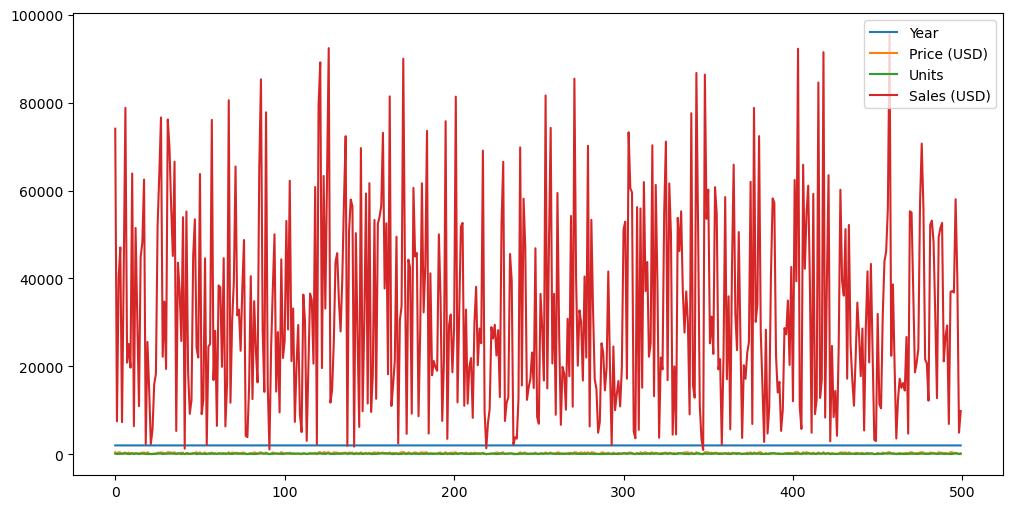

In [4]:
df.plot(figsize = (12,6))

In [5]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [6]:
df.head()

,Year,Country,Product Name,Dosage Form,Manufacturer,Price (USD),Units,Market / Channel,Sales (USD)
0,2025,India,DrugD,Syrup,Novartis,474.74,156,Retail,74059.44
1,2025,India,DrugB,Capsule,Roche,87.22,86,Retail,7500.92
2,2024,Germany,DrugB,IV Infusion,Sanofi,489.55,82,Hospital,40143.10
3,2025,Brazil,DrugC,Tablet,Sanofi,416.42,113,Hospital,47055.46
4,2024,Germany,DrugD,Capsule,Pfizer,43.98,166,Hospital,7300.68


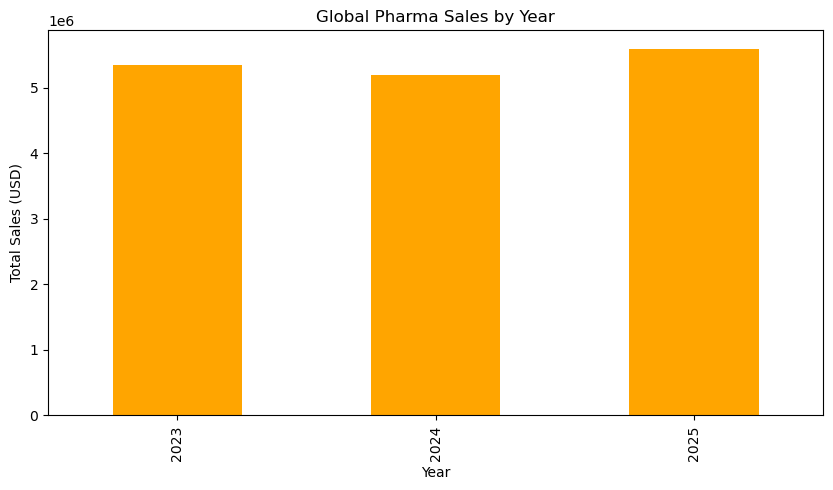

In [7]:

yearly_sales = df.groupby("Year")["Sales (USD)"].sum()

# Plot bar chart
plt.figure(figsize=(10,5))
yearly_sales.plot(kind="bar", color="orange")
plt.title("Global Pharma Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.show()


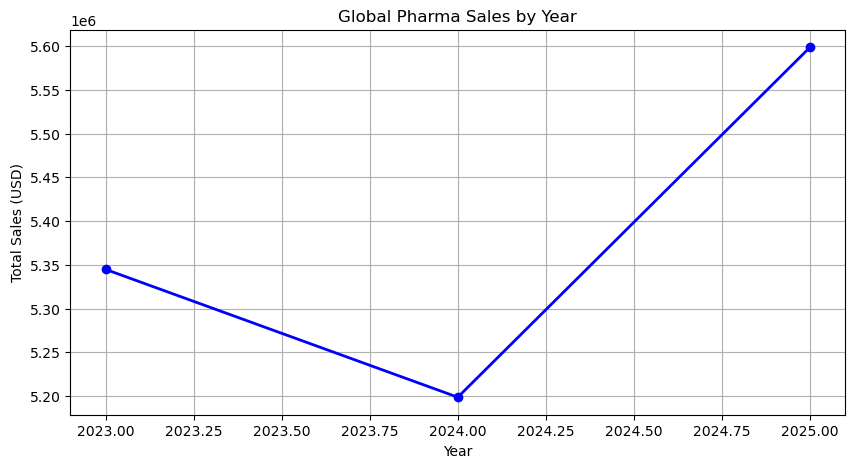

In [8]:
plt.figure(figsize=(10,5))
yearly_sales.plot(marker="o", linewidth=2, color="blue")
plt.title("Global Pharma Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  Price (USD)       Units   Sales (USD)
count   500.000000   500.000000  500.000000    500.000000
mean   2024.028000   253.548780  127.160000  32284.228620
std       0.817651   140.432403   44.266844  22122.780589
min    2023.000000    10.030000   50.000000    982.940000
25%    2023.000000   132.000000   86.750000  14638.112500
50%    2024.000000   257.345000  129.000000  27712.630000
75%    2025.000000   378.517500  168.000000  49423.140000
max    2025.000000   498.250000  200.000000  95532.450000


In [10]:
# Convert to DataFrame with datetime index
# Convert Year column to datetime index so we can treat it as a proper time series for resampling & forecasting

sales_df = yearly_sales.reset_index()
sales_df["Year"] = pd.to_datetime(sales_df["Year"], format="%Y")
sales_df.set_index("Year", inplace=True)

print("\nYearly Sales:")
print(sales_df)


Yearly Sales:
            Sales (USD)
Year                   
2023-01-01   5344808.47
2024-01-01   5198730.44
2025-01-01   5598575.40


In [11]:
sales_df.index

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', name='Year', freq=None)

In [12]:
 #Resample to monthly data
# Resampling is done to convert yearly data into monthly data.
# Many time series models (ARIMA/SARIMA) work better with higher frequency data (monthly),
# Since we only have yearly totals, we spread them evenly across 12 months as an approximation.


# Spread yearly sales equally across 12 months
monthly_sales = sales_df.resample(rule = "M").ffill()  # M means"Monthly", ffill()-forwardfills thevalue
monthly_sales["Sales (USD)"] = monthly_sales["Sales (USD)"] / 12

sales_series = monthly_sales["Sales (USD)"]




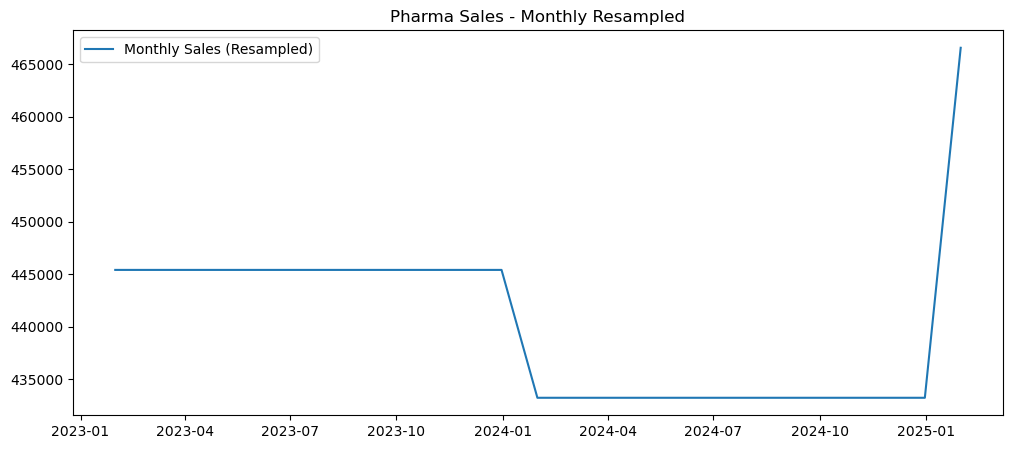

In [13]:
# Plot resampled data
plt.figure(figsize=(12,5))
plt.plot(sales_series, label="Monthly Sales (Resampled)")
plt.title("Pharma Sales - Monthly Resampled")
plt.legend()
plt.show()

In [14]:
sales_series

Year
2023-01-31    445400.705833
2023-02-28    445400.705833
2023-03-31    445400.705833
2023-04-30    445400.705833
2023-05-31    445400.705833
2023-06-30    445400.705833
2023-07-31    445400.705833
2023-08-31    445400.705833
2023-09-30    445400.705833
2023-10-31    445400.705833
2023-11-30    445400.705833
2023-12-31    445400.705833
2024-01-31    433227.536667
2024-02-29    433227.536667
2024-03-31    433227.536667
2024-04-30    433227.536667
2024-05-31    433227.536667
2024-06-30    433227.536667
2024-07-31    433227.536667
2024-08-31    433227.536667
2024-09-30    433227.536667
2024-10-31    433227.536667
2024-11-30    433227.536667
2024-12-31    433227.536667
2025-01-31    466547.950000
Freq: M, Name: Sales (USD), dtype: float64

In [15]:

#This step checks whether the variation in sales grows with time (multiplicative) or stays stable (additive). 

series = sales_series.dropna()

# Split the series into two halves
half = len(series) // 2
first_half = series[:half]
second_half = series[half:]

# Compute standard deviation for each half
std_first = np.std(first_half)
std_second = np.std(second_half)

print("Standard deviation - first half:", std_first)
print("Standard deviation - second half:", std_second)

""""- If the standard deviation in the second half is more than ~1.5 times the first half,  the series is considered multiplicative (variance grows with time).  
- Otherwise, it is considered additive (variance roughly constant). """

# Decide
if std_second > 1.5 * std_first:
    print("Likely Multiplicative (variance grows with trend)")
else:
    print("Likely Additive (variance roughly constant)")


Standard deviation - first half: 1.7462298274040222e-10
Standard deviation - second half: 8878.869049619812
Likely Multiplicative (variance grows with trend)


In [16]:
# Decompose the monthly sales series into trend, seasonal, and residual components(Classical Decomposition)
# - model='multiplicative': assumes seasonal fluctuations grow/shrink with trend
# - period=12: tells the function our data is monthly with a yearly seasonality cycle

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_series, model= 'multiplicative', period=12)

#trend
trend = decomposition.trend

#Repeating yearly seasonal pattern
seasonal = decomposition.seasonal

#noise after removing trend and seasonality
residual = decomposition.resid 

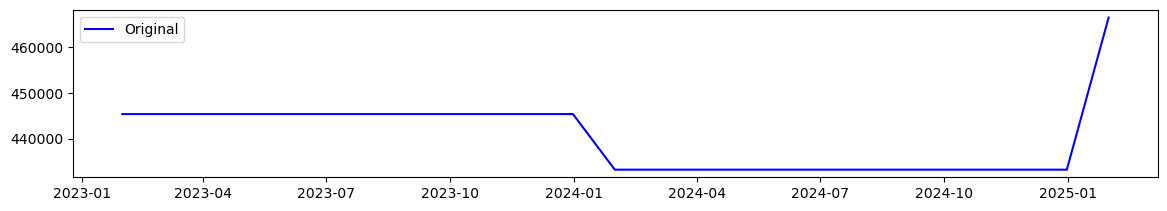

In [17]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(sales_series, label="Original", color="blue")
plt.legend(loc="upper left")

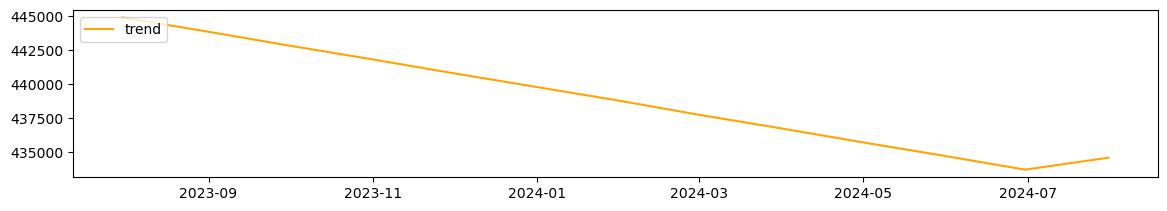

In [18]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(trend, label="trend", color='orange')
plt.legend(loc="upper left")

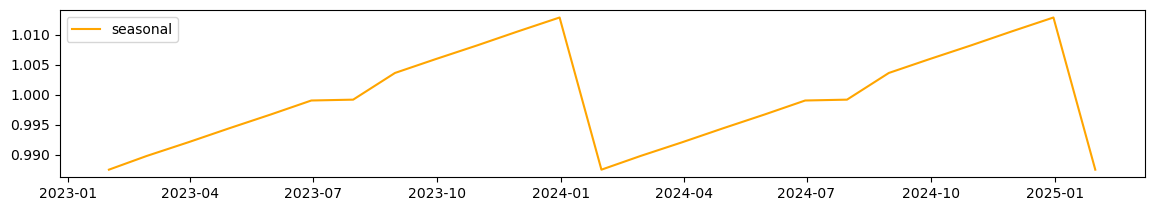

In [19]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(seasonal, label="seasonal", color='orange')
plt.legend(loc="upper left")

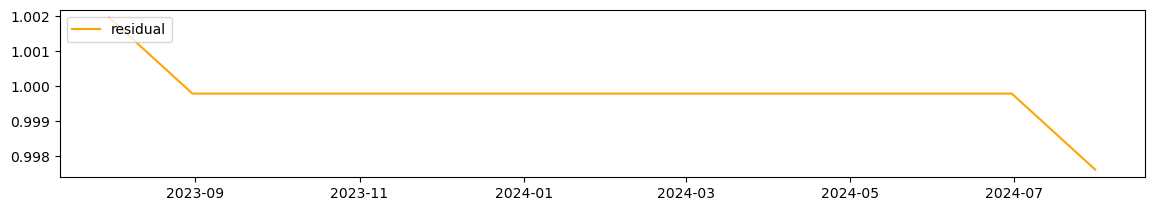

In [20]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(residual, label="residual", color='orange')
plt.legend(loc="upper left")

In [21]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss



In [22]:
adf_test = adfuller(sales_series.dropna())   # Run Augmented Dickey-Fuller test on the sales series (drop missing values)
print(f"Test Statistic: {adf_test[0]}") 
print(f"p-value: {adf_test[1]}")

#Decision Rule
if adf_test[1] < 0.05:
    print("Reject Null Hypothesis : series is stationary")
else:
    print("failed to reject null hypothesis: Series not stationary ")

Test Statistic: -1.2824326673350976
p-value: 0.6371705793442932
failed to reject null hypothesis: Series not stationary 


In [23]:
kpss_test = kpss(sales_series.dropna())  # Run KPSS test on the sales series (drop missing values)
print(f"Test Statistic: {kpss_test[0]}")
print(f"P-value: {kpss_test[1]}")

#Decision Rule
if kpss_test[1]< 0.05:
    print("Reject Null hypothesis: Series is non stationary")
else:
    print("Fail to reject null hypothesis: Series is stationary")

Test Statistic: 0.37262561478886996
P-value: 0.08895447638410778
Fail to reject null hypothesis: Series is stationary


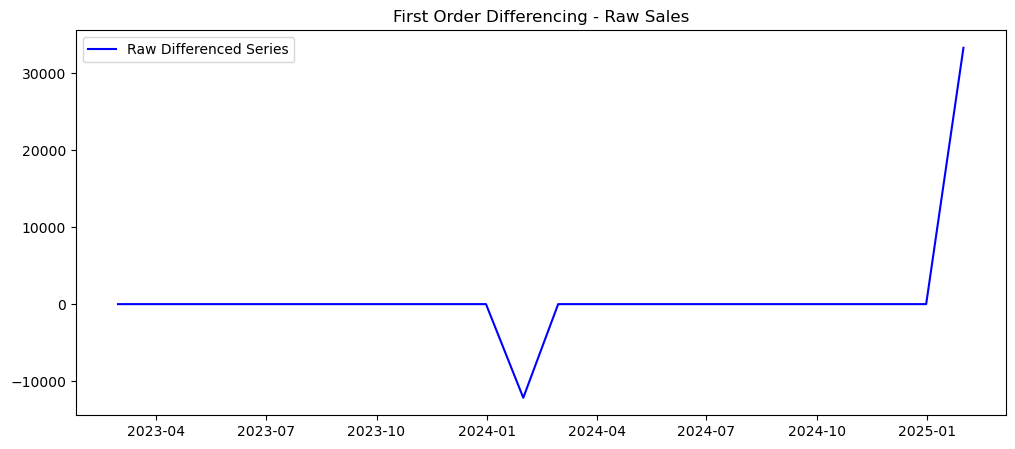

In [24]:
# First differencing (1st order)
sales_diff = sales_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12,5))
plt.plot(sales_diff, label="Raw Differenced Series", color="blue")
plt.title("First Order Differencing - Raw Sales")
plt.legend()
plt.show()




In [25]:
# ADF Test for first difference series
from statsmodels.tsa.stattools import adfuller, kpss

adf_test = adfuller(sales_diff)
print("ADF p-value (raw diff):", adf_test[1])

# KPSS Test
kpss_test = kpss(sales_diff, nlags="auto")
print("KPSS p-value (raw diff):", kpss_test[1])

ADF p-value (raw diff): 0.5687337452210697
KPSS p-value (raw diff): 0.1


C:\Users\SATYAM\AppData\Local\Temp\ipykernel_6500\767053371.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(sales_diff, nlags="auto")


After first differencing:

ADF test (p=0.56) → says series is not stationary.

KPSS test (p=0.10) → says series is stationary.

Since the two tests sometimes give opposite answers, we take a practical approach: assume d=1 is enough for differencing and confirm through model fitting.

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

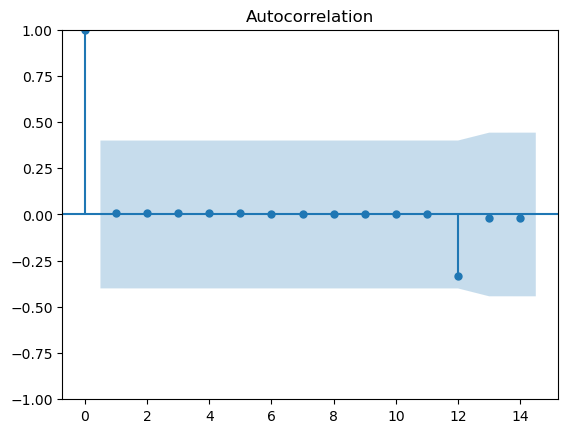

In [27]:
acf = plot_acf(sales_diff.dropna())

The first differencing has removed most of the trend and made the series approximately stationary. The series doesn’t show strong autocorrelations anymore, except possibly at seasonal lag 12.

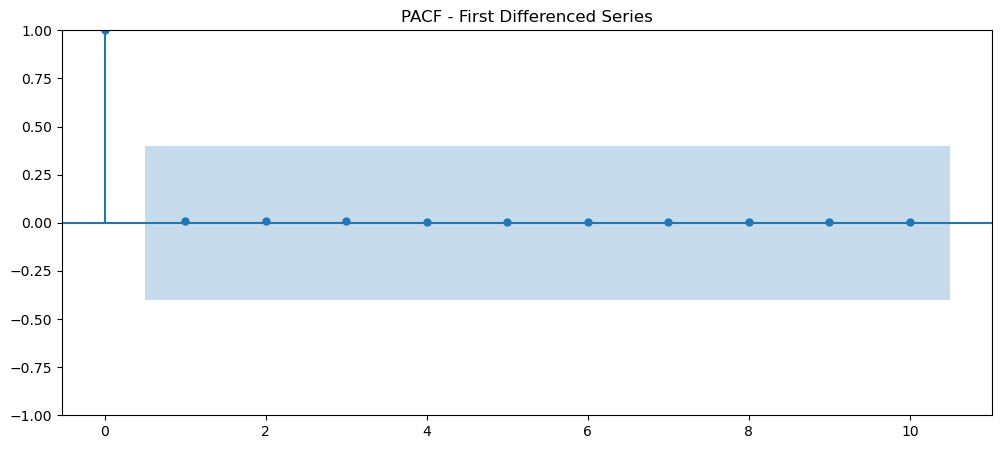

In [28]:
plt.figure(figsize=(12,5))
plot_pacf(sales_diff.dropna(), lags=10, ax=plt.gca(), method="ywm")
plt.title("PACF - First Differenced Series")
plt.show()

 PACF Plot:
 - The large spike at lag 0 (correlation of the series with itself).
 - All other lags (lag 1 and onwards) are inside the confidence band
 - This means there is no strong autoregressive structure remaining in the differenced series.



In [29]:
sales_series

Year
2023-01-31    445400.705833
2023-02-28    445400.705833
2023-03-31    445400.705833
2023-04-30    445400.705833
2023-05-31    445400.705833
2023-06-30    445400.705833
2023-07-31    445400.705833
2023-08-31    445400.705833
2023-09-30    445400.705833
2023-10-31    445400.705833
2023-11-30    445400.705833
2023-12-31    445400.705833
2024-01-31    433227.536667
2024-02-29    433227.536667
2024-03-31    433227.536667
2024-04-30    433227.536667
2024-05-31    433227.536667
2024-06-30    433227.536667
2024-07-31    433227.536667
2024-08-31    433227.536667
2024-09-30    433227.536667
2024-10-31    433227.536667
2024-11-30    433227.536667
2024-12-31    433227.536667
2025-01-31    466547.950000
Freq: M, Name: Sales (USD), dtype: float64

In [30]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [31]:
train = sales_series.loc['2023']
test = sales_series.loc['2024']

In [32]:
horizon = len(test)

In [33]:
print("Train covers:", train.index.min(), "to", train.index.max())
print("Test covers:", train.index.min(), "to", test.index.max())

Train covers: 2023-01-31 00:00:00 to 2023-12-31 00:00:00
Test covers: 2023-01-31 00:00:00 to 2024-12-31 00:00:00


In [34]:
arima_model = ARIMA(sales_series, order=(1,1,1))
arima_res = arima_model.fit()
arima_fc = arima_res.forecast(steps=24)


C:\Users\SATYAM\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


order=(1,1,1) → ARIMA with:
 p=1 → includes one AR term (captures short-term persistence)
  d=1 → first differencing (removes trend, makes series stationary)
  q=1 → includes one MA term (captures short-term shocks/noise)

forecast(steps=24) → generate 24 months ahead prediction = 2 years
 (since our data is monthly after resampling)


In [35]:
arima_fc

2025-02-28    466547.95
2025-03-31    466547.95
2025-04-30    466547.95
2025-05-31    466547.95
2025-06-30    466547.95
2025-07-31    466547.95
2025-08-31    466547.95
2025-09-30    466547.95
2025-10-31    466547.95
2025-11-30    466547.95
2025-12-31    466547.95
2026-01-31    466547.95
2026-02-28    466547.95
2026-03-31    466547.95
2026-04-30    466547.95
2026-05-31    466547.95
2026-06-30    466547.95
2026-07-31    466547.95
2026-08-31    466547.95
2026-09-30    466547.95
2026-10-31    466547.95
2026-11-30    466547.95
2026-12-31    466547.95
2027-01-31    466547.95
Freq: M, Name: predicted_mean, dtype: float64

In [36]:
sarima_model = SARIMAX(sales_series, order=(1,1,1), seasonal_order=(1,0,1,12))
sarima_result = sarima_model.fit()
sarima_fore = sarima_result.forecast(steps=24)






C:\Users\SATYAM\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 SARIMAX with order=(1,1,1), seasonal_order=(1,0,1,12)
 → (p,d,q) = (1,1,1): same as ARIMA → persistence, differencing, noise
 → (P,D,Q,m) = (1,0,1,12): adds yearly seasonality (12 months cycle)

 forecast(steps=24) → forecast 24 months ahead = 2 years


In [37]:
sarima_fore

2025-02-28    466548.619873
2025-03-31    466548.816189
2025-04-30    466548.873673
2025-05-31    466548.890340
2025-06-30    466548.894604
2025-07-31    466548.893737
2025-08-31    466548.886261
2025-09-30    466548.859427
2025-10-31    466548.767486
2025-11-30    466548.453675
2025-12-31    466547.382934
2026-01-31    445142.484932
2026-02-28    445142.453950
2026-03-31    445142.444885
2026-04-30    445142.442281
2026-05-31    445142.441695
2026-06-30    445142.442131
2026-07-31    445142.444331
2026-08-31    445142.452046
2026-09-30    445142.478432
2026-10-31    445142.568476
2026-11-30    445142.875707
2026-12-31    445143.923961
2027-01-31    466099.253130
Freq: M, Name: predicted_mean, dtype: float64

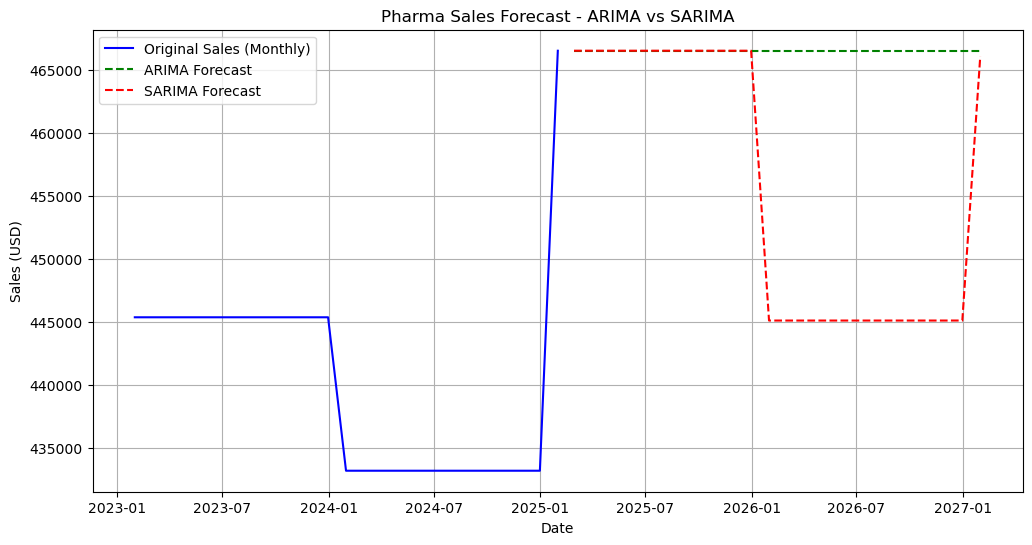

In [38]:
plt.figure(figsize=(12,6))
plt.plot(sales_series, label="Original Sales (Monthly)", color="blue")
plt.plot(arima_fc, label="ARIMA Forecast", color="green", linestyle="--")
plt.plot(sarima_fore, label="SARIMA Forecast", color="red", linestyle="--")

plt.title("Pharma Sales Forecast - ARIMA vs SARIMA")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
!pip install prophet


#Prophet modelling

In [40]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
# Convert the sales time series into a DataFrame with columns 'ds' (date) and 'y' (value),
# since Prophet requires this format
prophet_df = sales_series.reset_index()
prophet_df

,Year,Sales (USD)
0,2023-01-31,445400.705833
1,2023-02-28,445400.705833
2,2023-03-31,445400.705833
3,2023-04-30,445400.705833
4,2023-05-31,445400.705833
5,2023-06-30,445400.705833
6,2023-07-31,445400.705833
7,2023-08-31,445400.705833
8,2023-09-30,445400.705833
9,2023-10-31,445400.705833


In [42]:
prophet_df.columns = ["ds", "y"] 

In [43]:
prophet_df

,ds,y
0,2023-01-31,445400.705833
1,2023-02-28,445400.705833
2,2023-03-31,445400.705833
3,2023-04-30,445400.705833
4,2023-05-31,445400.705833
5,2023-06-30,445400.705833
6,2023-07-31,445400.705833
7,2023-08-31,445400.705833
8,2023-09-30,445400.705833
9,2023-10-31,445400.705833


In [44]:
# Initialize the Prophet model
# - yearly_seasonality=True enables yearly seasonality
# - weekly_seasonality=False disables weekly seasonality
# - daily_seasonality=False disables daily seasonality


model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

In [45]:
# Fit the Prophet model to the sales data
model=model.fit(prophet_df)

10:52:22 - cmdstanpy - INFO - Chain [1] start processing
10:53:10 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
model

In [47]:
#  future dataframe for forecasting
# - periods=24 generates 24 future time points
# - freq="M" specifies monthly frequency

future = model.make_future_dataframe(periods=24, freq="M")

In [48]:
# Generate forecasts for both historical and future dates
forecast = model.predict(future)


In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-31,439121.928759,445400.880835,445400.880836,439121.928759,439121.928759,6278.952076,6278.952076,6278.952076,6278.952076,6278.952076,6278.952076,0.0,0.0,0.0,445400.880835
1,2023-02-28,438735.010779,445400.665004,445400.665005,438735.010779,438735.010779,6665.654225,6665.654225,6665.654225,6665.654225,6665.654225,6665.654225,0.0,0.0,0.0,445400.665005
2,2023-03-31,437656.635869,445400.682002,445400.682003,437656.635869,437656.635869,7744.046134,7744.046134,7744.046134,7744.046134,7744.046134,7744.046134,0.0,0.0,0.0,445400.682002
3,2023-04-30,438754.674659,445400.808697,445400.808697,438754.674659,438754.674659,6646.134038,6646.134038,6646.134038,6646.134038,6646.134038,6646.134038,0.0,0.0,0.0,445400.808697
4,2023-05-31,440414.663434,445400.872002,445400.872003,440414.663434,440414.663434,4986.208569,4986.208569,4986.208569,4986.208569,4986.208569,4986.208569,0.0,0.0,0.0,445400.872003
5,2023-06-30,441070.255847,445400.845489,445400.845490,441070.255847,441070.255847,4330.589642,4330.589642,4330.589642,4330.589642,4330.589642,4330.589642,0.0,0.0,0.0,445400.845489
6,2023-07-31,442152.473045,445400.831001,445400.831001,442152.473045,442152.473045,3248.357956,3248.357956,3248.357956,3248.357956,3248.357956,3248.357956,0.0,0.0,0.0,445400.831001
7,2023-08-31,442397.374340,445400.762649,445400.762650,442397.374340,442397.374340,3003.388310,3003.388310,3003.388310,3003.388310,3003.388310,3003.388310,0.0,0.0,0.0,445400.762649
8,2023-09-30,442782.285780,445400.701965,445400.701966,442782.285780,442782.285780,2618.416185,2618.416185,2618.416185,2618.416185,2618.416185,2618.416185,0.0,0.0,0.0,445400.701966
9,2023-10-31,441348.501081,445400.824937,445400.824938,441348.501081,441348.501081,4052.323856,4052.323856,4052.323856,4052.323856,4052.323856,4052.323856,0.0,0.0,0.0,445400.824938


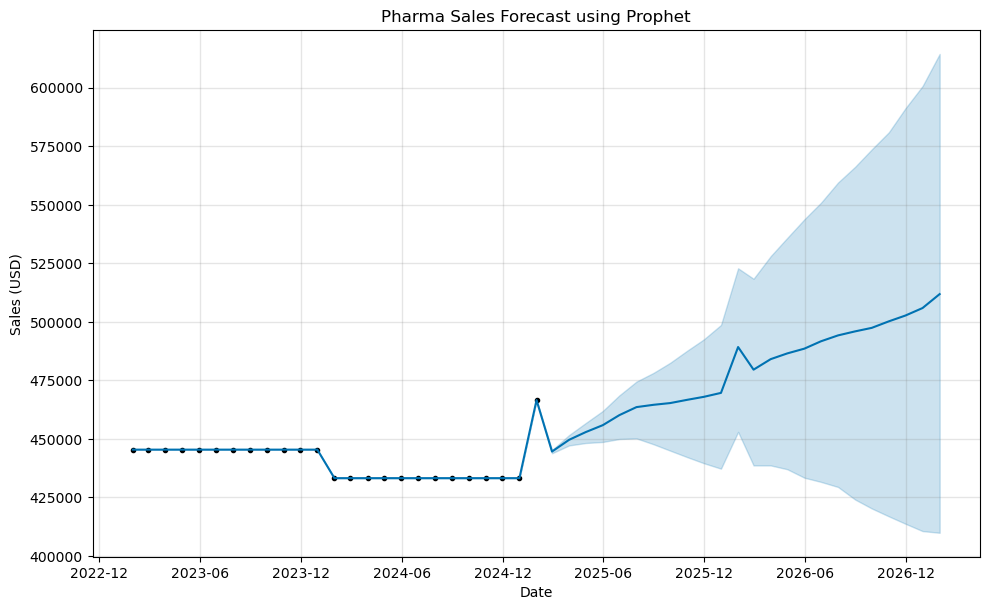

In [50]:
fig = model.plot(forecast)
plt.title("Pharma Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.show()

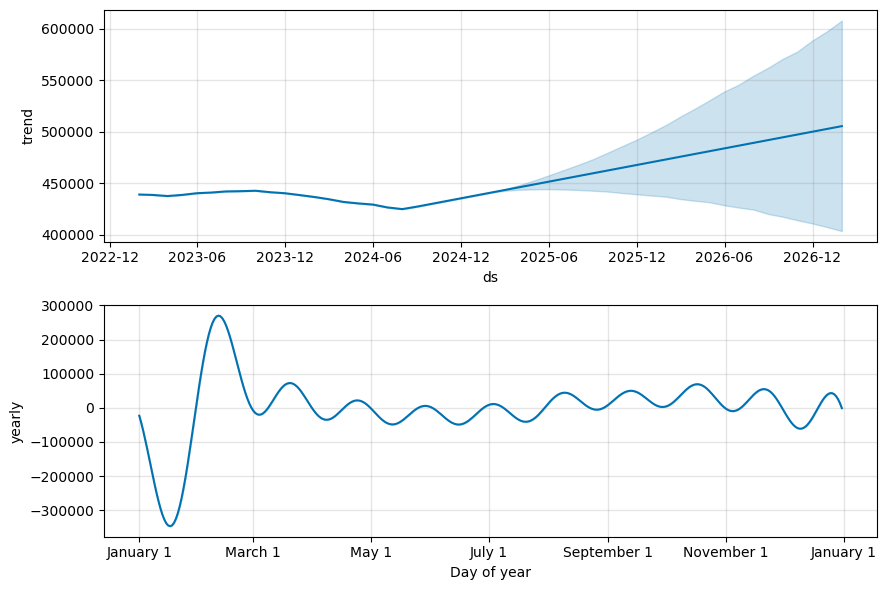

In [51]:
fig1 = model.plot_components(forecast)
plt.show()

In [52]:
# Show forecasted values (last 24 months)
forecast_future = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(24)
# Rename columns 
forecast_future = forecast_future.rename(columns={
    "ds": "Date",
    "yhat": "Forecasted_Sales",
    "yhat_lower": "Lower_Bound",
    "yhat_upper": "Upper_Bound"
})
print(forecast_future)

         Date  Forecasted_Sales    Lower_Bound    Upper_Bound
25 2025-02-28     444583.426641  443845.886749  445235.597076
26 2025-03-31     449601.367584  447197.991319  451634.548049
27 2025-04-30     452885.231936  448229.541169  456755.328426
28 2025-05-31     455853.720254  448679.449153  461922.162551
29 2025-06-30     460138.381078  449946.357086  468573.147318
30 2025-07-31     463563.008923  450198.734498  474460.648351
31 2025-08-31     464551.688153  447686.796074  478198.721529
32 2025-09-30     465284.874150  444968.948857  482485.195049
33 2025-10-31     466684.096424  442182.215881  487680.369589
34 2025-11-30     467952.147885  439599.702628  492495.896103
35 2025-12-31     469634.874865  437279.339063  498635.685217
36 2026-01-31     489215.942489  452974.280978  522838.658594
37 2026-02-28     479557.408807  438652.706788  518374.944867
38 2026-03-31     484041.644328  438656.405105  528011.762778
39 2026-04-30     486492.427649  437037.765240  535804.510497
40 2026-

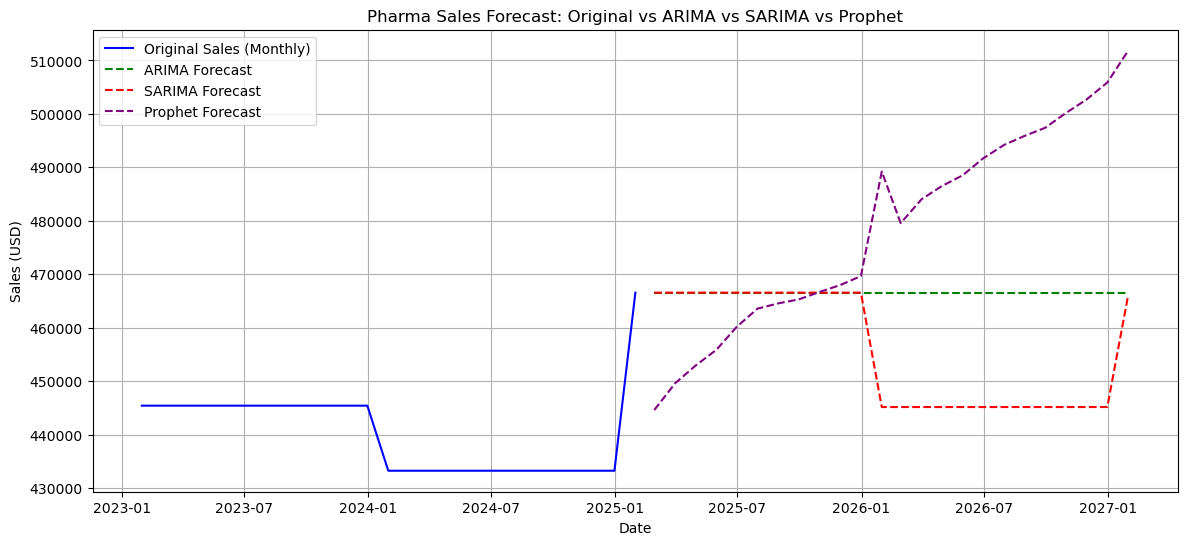

In [55]:
#  Compare ARIMA, SARIMA, Prophet

plt.figure(figsize=(14,6))

# Plot original series
plt.plot(sales_series, label="Original Sales (Monthly)", color="blue")

# Plot ARIMA forecast
plt.plot(arima_fc.index, arima_fc, label="ARIMA Forecast", color="green", linestyle="--")

# Plot SARIMA forecast
plt.plot(sarima_fore.index, sarima_fore, label="SARIMA Forecast", color="red", linestyle="--")

# Prophet forecast 
prophet_pred = forecast_future.set_index("Date")["Forecasted_Sales"]

plt.plot(prophet_pred.index, prophet_pred, 
         label="Prophet Forecast", color="purple", linestyle="--")


# Labels, title, legend
plt.title("Pharma Sales Forecast: Original vs ARIMA vs SARIMA vs Prophet")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.show()


# LSTM


In [56]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense


In [57]:
# Scale the data between 0 and 1
scaler = MinMaxScaler()
data = scaler.fit_transform(sales_series.values.reshape(-1, 1))

#data' is a numpy array of scaled sales values (between 0 and 1)

In [58]:
data

array([[0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.36533668],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ]])

In [121]:
"""
    Create sequences of length 'steps' for LSTM.
    Each X (input) is the past 'steps' months,
    and each y (target) is the value of the next month.
    """

def create_sequences(data, steps=12):
    X, y = [], []
    for i in range(len(data)-steps):
        X.append(data[i:i+steps]) # X = window of 'steps' past values
        y.append(data[i+steps]) # y = value right after that window
    return np.array(X), np.array(y)
time_steps = 12   # 12 months
X, y = create_sequences(data, time_steps)

In [60]:
# Train-test split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [61]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1)) # output layer → predicts 1 value
model.compile(optimizer='adam', loss='mse')

In [62]:

# Train on training set for 10 epochs (passes over dataset), batch_size=8 samples at a time
model.fit(X_train, y_train, epochs=10, batch_size=8)

Epoch 1/10

2/2 [==============================] - 5s 30ms/step - loss: 3.3446e-05
Epoch 2/10
2/2 [==============================] - 0s 18ms/step - loss: 2.3609e-05
Epoch 3/10
2/2 [==============================] - 0s 20ms/step - loss: 3.3343e-06
Epoch 4/10
2/2 [==============================] - 0s 18ms/step - loss: 1.1490e-05
Epoch 5/10
2/2 [==============================] - 0s 19ms/step - loss: 9.5201e-06
Epoch 6/10
2/2 [==============================] - 0s 15ms/step - loss: 1.5220e-06
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 6.1064e-06
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 2.9881e-06
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 1.8501e-06
Epoch 10/10
2/2 [==============================] - 0s 16ms/step - loss: 4.7258e-06


In [63]:
# Predict1, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# Inverse transform back to original sales scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

1/1 [==============================] - 1s 703ms/step


In [64]:
future_steps = (2027 - sales_series.index[-1].year) * 12  # months till 2027

last_seq = data[-time_steps:] # last 12 months scaled
predictions = []
current_seq = last_seq.copy()


In [65]:
for _ in range(future_steps):
    
     # Model predicts next month based on current 12 months
    pred = model.predict(current_seq.reshape(1, time_steps, 1), verbose=0)
    predictions.append(pred[0,0])
    
     # Model predicts next month based on current 12 months
    current_seq = np.append(current_seq[1:], pred)[-time_steps:]


In [66]:
# Convert predictions back to original sales scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

In [88]:
last_date = sales_series.index[-1]
future_dates = pd.date_range(last_date + pd.offsets.MonthBegin(1), periods=future_steps, freq="MS")

# Store forecast in pandas Series
lstm_forecast = pd.Series(predictions.flatten(), index=future_dates)


In [90]:
result = pd.concat([sales_series, lstm_forecast])

print("Train size:", len(X_train))
print("Test size:", len(X_test))
print(result.tail(20))   # see

Train size: 10
Test size: 3
2025-06-01    433268.81250
2025-07-01    433251.28125
2025-08-01    433235.50000
2025-09-01    433222.56250
2025-10-01    433211.75000
2025-11-01    433202.71875
2025-12-01    433194.93750
2026-01-01    433188.93750
2026-02-01    433180.03125
2026-03-01    433180.18750
2026-04-01    433180.34375
2026-05-01    433180.50000
2026-06-01    433180.59375
2026-07-01    433180.68750
2026-08-01    433180.75000
2026-09-01    433180.81250
2026-10-01    433180.84375
2026-11-01    433180.87500
2026-12-01    433180.90625
2027-01-01    433180.90625
dtype: float64


In [92]:
print(lstm_forecast.head(5))   # first 5 forecasted months
print(lstm_forecast.tail(5))   # last 5 forecasted months (close to 2027)


2025-02-01    433347.65625
2025-03-01    433320.62500
2025-04-01    433305.18750
2025-05-01    433286.90625
2025-06-01    433268.81250
Freq: MS, dtype: float32
2026-09-01    433180.81250
2026-10-01    433180.84375
2026-11-01    433180.87500
2026-12-01    433180.90625
2027-01-01    433180.90625
Freq: MS, dtype: float32


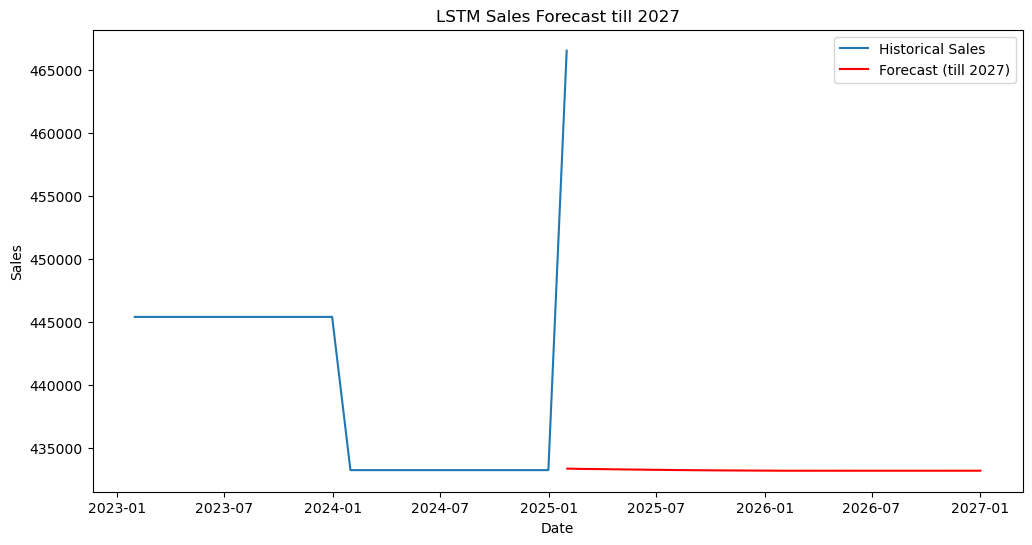

In [93]:
plt.figure(figsize=(12,6))
plt.plot(sales_series, label="Historical Sales")
plt.plot(lstm_forecast, label="Forecast (till 2027)", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("LSTM Sales Forecast till 2027")
plt.show()

# XgBoost

In [94]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

Lagged features = past values of the series, used as input features so the ML model can learn patterns and predict the future.

In [117]:
#Create lagged features using pandas.shift
def create_lagged_features(series, window=12):
  
    #Putting the series into a DataFrame so we can add extra columns easily
    df = pd.DataFrame({'y': series})
    
    # creating  lag columns: lag_1 = t-1, lag_2 = t-2, ..., lag_window = t-window
    
    for i in range(1, window + 1):
        df[f'lag_{i}'] = df['y'].shift(i)
        
     # drop rows that don't have full lag history    
    df = df.dropna()
    
     #Build the features DataFrame (lag_1 ... lag_window)
    feature_df = df[[f'lag_{i}' for i in range(1, window + 1)]]
    
    #Convert features and targets into numpy arrays
    X = feature_df.values           
    y = df['y'].values
    return X, y, feature_df

In [107]:
window = 12
X, y, feat_df = create_lagged_features(sales_series, window)
print("X shape:", X.shape)   # (n_samples, 12)
print("y shape:", y.shape)   # (n_samples,)


X shape: (13, 12)
y shape: (13,)


In [118]:
split = int(len(X)*0.8)   # 80% train, 20% test

# Split the input features (X) into training (first 80%) and testing (last 20%)
X_train, X_test = X[:split], X[split:]

# Split the target values (y) the same way
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

In [119]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [112]:
#  Forecast into the future 
future_months = 36   # forecast horizon (e.g., 3 years)

# Start with the last 'window' months from the original series
last_window = sales_series.values[-window:].astype(float).copy() 

# This list will store the predicted future values, one by one
xgb_forecast = []

for i in range(future_months):
    X_input = last_window.reshape(1, -1)   # shape (1, window)
    
     # Predict the next month's sales using the trained XGBoost model
    pred = model.predict(X_input)[0]   # scalar
    
    # Store this prediction into our forecast list
    xgb_forecast.append(pred)
    
    # move the window forward: drop oldest, append predicted
    
    last_window = np.roll(last_window, -1)
    last_window[-1] = pred

In [113]:


# If sales_series index points to month-start use freq='MS', else 'M' for month-end

last_date = sales_series.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=future_months, freq='MS')
xgb_forecast_series = pd.Series(xgb_forecast, index=future_dates, name='XGBoost')


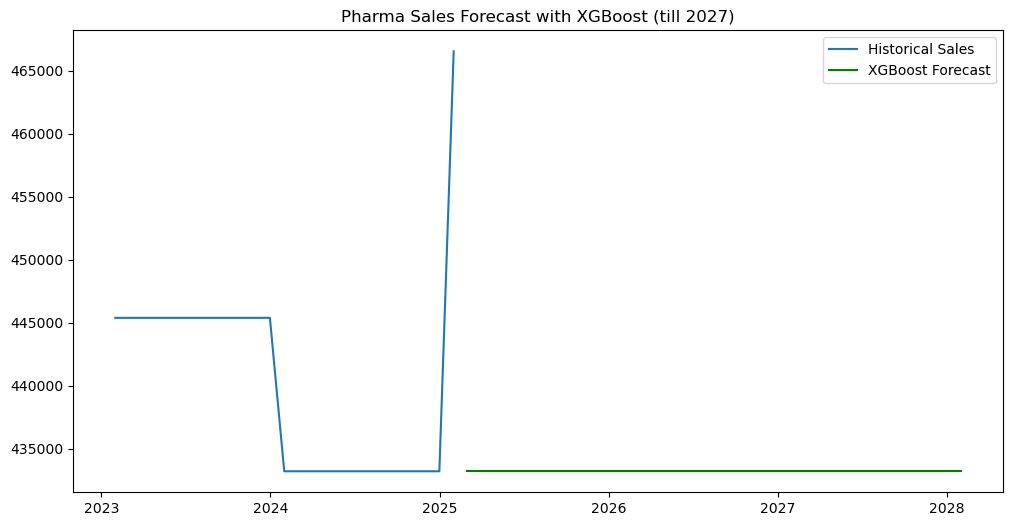

In [114]:
plt.figure(figsize=(12,6))
plt.plot(sales_series, label="Historical Sales")
plt.plot(forecast_series, label="XGBoost Forecast", color="green")
plt.legend()
plt.title("Pharma Sales Forecast with XGBoost (till 2027)")
plt.show()

In [115]:
forecast_df = pd.DataFrame({
    "Date": forecast_series.index,
    "Forecasted_Sales": forecast_series.values
})
print(forecast_df.tail(10))  

         Date  Forecasted_Sales
26 2027-04-30      433227.53125
27 2027-05-31      433227.53125
28 2027-06-30      433227.53125
29 2027-07-31      433227.53125
30 2027-08-31      433227.53125
31 2027-09-30      433227.53125
32 2027-10-31      433227.53125
33 2027-11-30      433227.53125
34 2027-12-31      433227.53125
35 2028-01-31      433227.53125


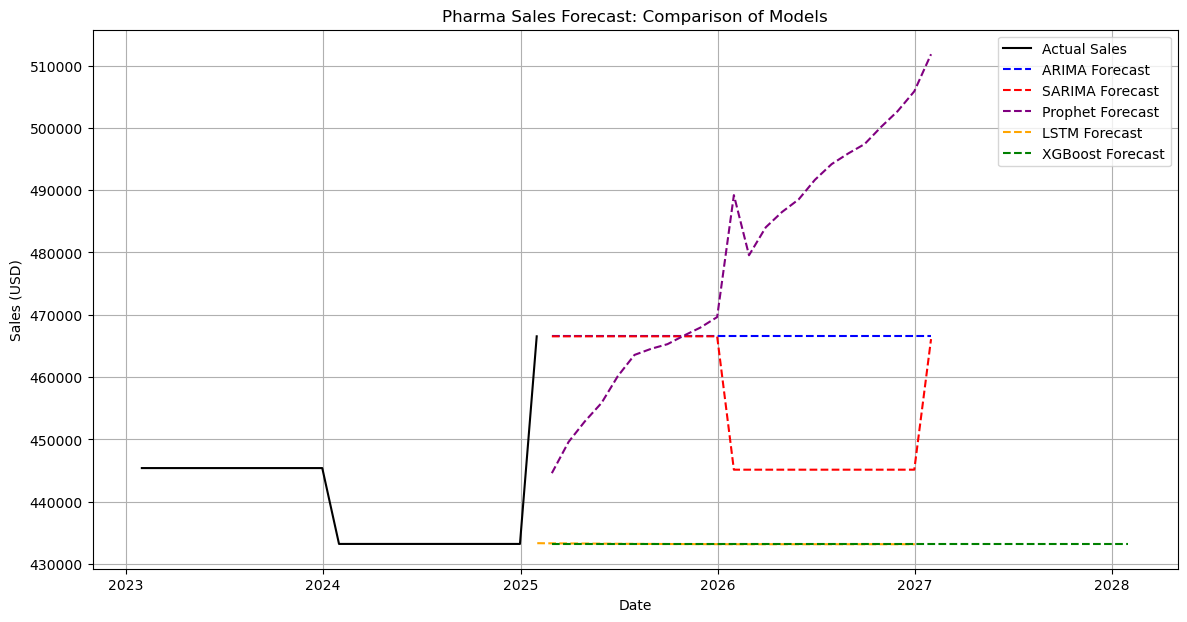

In [116]:
plt.figure(figsize=(14,7))

# Actual
plt.plot(sales_series, label="Actual Sales", color="black")

# ARIMA
plt.plot(arima_fc.index, arima_fc, label="ARIMA Forecast", linestyle="--", color="blue")

# SARIMA
plt.plot(sarima_fore.index, sarima_fore, label="SARIMA Forecast", linestyle="--", color="red")

# Prophet
plt.plot(forecast_future["Date"], forecast_future["Forecasted_Sales"], 
         label="Prophet Forecast", linestyle="--", color="purple")

# LSTM
plt.plot(lstm_forecast.index, lstm_forecast.values, 
         label="LSTM Forecast", linestyle="--", color="orange")

# XGBoost
plt.plot(forecast_series.index, forecast_series.values, 
         label="XGBoost Forecast", linestyle="--", color="green")

plt.title("Pharma Sales Forecast: Comparison of Models")
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.legend()
plt.grid(True)
plt.show()
